# Face Detection:

#### Classifier Used:
#### Haar Cascade Classifier is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

## 1. For still images:

In [100]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
# Reading the image and applying Gaussian Kernal to handle noise
img = cv2.imread("C:\\Users\\dell\\Downloads\\Data (2)\\Data\\lenna.jpeg")
img = cv2.GaussianBlur(img,(3,3),0)             

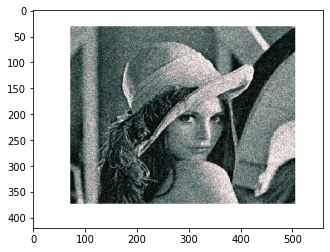

In [102]:
plt.imshow(img)
plt.show()

In [103]:
# Loading the classifier for frontal face
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [104]:
faces_rects = face_cascade.detectMultiScale(img, scaleFactor = 1.2, minNeighbors = 5);

# Printing the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


In [105]:
# Drawing the rectangle for returned coordinates
for (x,y,w,h) in faces_rects:
     cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

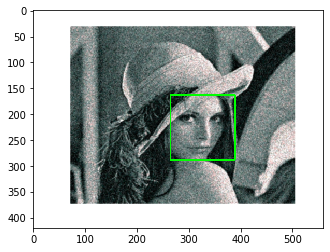

In [106]:
plt.imshow(img)

## 2. For Video Input:

In [107]:
# Loading the classifier for frontal face and eye
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Camera captures
cam = cv2.VideoCapture(0)

# Once camera capture is initialized
while 1:
    ret, image = cam.read()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detecting different sizes of faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        # Draws rectangle around a face
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            # Draws rectangle around eyes
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('img',image)
    
    k = cv2.waitKey(30) & 0xff    #Escape Key to stop
    if k == 27:
        break

cam.release()         # Closes the window
cv2.destroyAllWindows()   #Memory De-allocation